# Web Scraping Lab

You will find in this notebook some scrapy exercises to practise your scraping skills.

**Tips:**

- Check the response status code for each request to ensure you have obtained the intended contennt.
- Print the response text in each request to understand the kind of info you are getting and its format.
- Check for patterns in the response text to extract the data/info requested in each question.
- Visit each url and take a look at its source through Chrome DevTools. You'll need to identify the html tags, special class names etc. used for the html content you are expected to extract.

- [Requests library](http://docs.python-requests.org/en/master/#the-user-guide) documentation 
- [Beautiful Soup Doc](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Urllib](https://docs.python.org/3/library/urllib.html#module-urllib)
- [re lib](https://docs.python.org/3/library/re.html)
- [lxml lib](https://lxml.de/)
- [Scrapy](https://scrapy.org/)
- [List of HTTP status codes](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)
- [HTML basics](http://www.simplehtmlguide.com/cheatsheet.php)
- [CSS basics](https://www.cssbasics.com/#page_start)

#### Below are the libraries and modules you may need. `requests`,  `BeautifulSoup` and `pandas` are imported for you. If you prefer to use additional libraries feel free to uncomment them.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
# from pprint import pprint
# from lxml import html
# from lxml.html import fromstring
# import urllib.request
# from urllib.request import urlopen
import random
import re
# import scrapy

#### Download, parse (using BeautifulSoup), and print the content from the Trending Developers page from GitHub:

In [181]:
# This is the url you will scrape in this exercise
url = 'https://github.com/trending/developers'

In [182]:
#your code
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
#print(soup.prettify())

#### Display the names of the trending developers retrieved in the previous step.

Your output should be a Python list of developer names. Each name should not contain any html tag.

**Instructions:**

1. Find out the html tag and class names used for the developer names. You can achieve this using Chrome DevTools.

1. Use BeautifulSoup to extract all the html elements that contain the developer names.

1. Use string manipulation techniques to replace whitespaces and linebreaks (i.e. `\n`) in the *text* of each html element. Use a list to store the clean names.

1. Print the list of names.

Your output should look like below:

```
['trimstray (@trimstray)',
 'joewalnes (JoeWalnes)',
 'charlax (Charles-AxelDein)',
 'ForrestKnight (ForrestKnight)',
 'revery-ui (revery-ui)',
 'alibaba (Alibaba)',
 'Microsoft (Microsoft)',
 'github (GitHub)',
 'facebook (Facebook)',
 'boazsegev (Bo)',
 'google (Google)',
 'cloudfetch',
 'sindresorhus (SindreSorhus)',
 'tensorflow',
 'apache (TheApacheSoftwareFoundation)',
 'DevonCrawford (DevonCrawford)',
 'ARMmbed (ArmMbed)',
 'vuejs (vuejs)',
 'fastai (fast.ai)',
 'QiShaoXuan (Qi)',
 'joelparkerhenderson (JoelParkerHenderson)',
 'torvalds (LinusTorvalds)',
 'CyC2018',
 'komeiji-satori (神楽坂覚々)',
 'script-8']
 ```

In [184]:
#your code
def processNameUser(tag):
    try:
        name = tag.select('h1[class="h3 lh-condensed"] a')[0].text.strip()
        user = tag.select('p[class="f4 text-normal mb-1"] a')[0].text.strip()
        string = name+" (@"+user+")"
        return string
    except:
        return None
        
first = soup.select('article[class^="Box-row d-flex"]')
#print(len(first))
#print(first)

ranking = [processName(i) for i in first]
ranking

['mattn (@mattn)',
 'Andreas Mueller (@amueller)',
 'Brian C (@brianc)',
 'Erik Schierboom (@ErikSchierboom)',
 'John Sundell (@JohnSundell)',
 'Siddharth Kshetrapal (@siddharthkp)',
 'Jason Williams (@jasonwilliams)',
 'Kyle Conroy (@kyleconroy)',
 'Anthony Sottile (@asottile)',
 'William Candillon (@wcandillon)',
 'Colin Rofls (@cmyr)',
 'Filip Skokan (@panva)',
 'Amila Welihinda (@amilajack)',
 'Kristoffer Carlsson (@KristofferC)',
 'Giulio Canti (@gcanti)',
 'greatghoul (@greatghoul)',
 'Miek Gieben (@miekg)',
 'Jesse Katsumata (@Naturalclar)',
 'Lucas Michot (@lucasmichot)',
 'Adam Geitgey (@ageitgey)',
 'Philipp Oppermann (@phil-opp)',
 'Tony Narlock (@tony)',
 'isaacs (@isaacs)',
 'Florian Rival (@4ian)',
 'Satyajit Sahoo (@satya164)']

#### Display the trending Python repositories in GitHub

The steps to solve this problem is similar to the previous one except that you need to find out the repository names instead of developer names.

In [107]:
# This is the url you will scrape in this exercise
url = 'https://github.com/trending/python?since=daily'
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
#print(soup.prettify())

In [108]:
#your code
def processUserTopic(tag):
    try:
        topic = tag.select('h1[class="h3 lh-condensed"]')[0].text.strip().replace("\n","").replace(" ","")
        return topic
    except:
        return None
        
first = soup.select('article[class^="Box-row"]')
print(len(first))
#print(first)

ranking = [processUserTopic(i) for i in first]
ranking

25


['BlankerL/DXY-2019-nCoV-Crawler',
 'gto76/python-cheatsheet',
 'smicallef/spiderfoot',
 'sebastianruder/NLP-progress',
 'rish-16/sight',
 'luong-komorebi/Awesome-Linux-Software',
 'vinta/awesome-python',
 'nicrusso7/rex-gym',
 'baowenbo/DAIN',
 'eastlakeside/interpy-zh',
 'tiangolo/fastapi',
 'explosion/thinc',
 'willmcgugan/rich',
 'MatthewPierson/Vieux',
 'CCExtractor/vardbg',
 'dragen1860/Deep-Learning-with-TensorFlow-book',
 'brendangregg/bpf-perf-tools-book',
 'googleapis/google-cloud-python',
 'anchore/anchore-engine',
 'aj-4/tinder-swipe-bot',
 'pytorch/captum',
 'samuelhwilliams/Eel',
 'salesforce/policy_sentry',
 'yzhao062/anomaly-detection-resources',
 'vineetjohn/daily-coding-problem']

#### Display all the image links from Walt Disney wikipedia page

In [460]:
# This is the url you will scrape in this exercise
url = 'https://en.wikipedia.org/wiki/Walt_Disney'
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
#print(soup.prettify())

In [461]:
#your code
def processImg(tag):
    try:
        url = tag.get("href")
        return url
    except:
        return None
        
first = soup.select('a[class^="image"]')
#print(len(first))
#print(first)

urlzero = "https://en.wikipedia.org"
pics = [urlzero+processImg(i) for i in first]
pics

['https://en.wikipedia.org/wiki/File:Walt_Disney_1946.JPG',
 'https://en.wikipedia.org/wiki/File:Walt_Disney_1942_signature.svg',
 'https://en.wikipedia.org/wiki/File:Walt_Disney_envelope_ca._1921.jpg',
 'https://en.wikipedia.org/wiki/File:Trolley_Troubles_poster.jpg',
 'https://en.wikipedia.org/wiki/File:Walt_Disney_and_his_cartoon_creation_%22Mickey_Mouse%22_-_National_Board_of_Review_Magazine.jpg',
 'https://en.wikipedia.org/wiki/File:Steamboat-willie.jpg',
 'https://en.wikipedia.org/wiki/File:Walt_Disney_1935.jpg',
 'https://en.wikipedia.org/wiki/File:Walt_Disney_Snow_white_1937_trailer_screenshot_(13).jpg',
 'https://en.wikipedia.org/wiki/File:Disney_drawing_goofy.jpg',
 'https://en.wikipedia.org/wiki/File:DisneySchiphol1951.jpg',
 'https://en.wikipedia.org/wiki/File:WaltDisneyplansDisneylandDec1954.jpg',
 'https://en.wikipedia.org/wiki/File:Walt_disney_portrait_right.jpg',
 'https://en.wikipedia.org/wiki/File:Walt_Disney_Grave.JPG',
 'https://en.wikipedia.org/wiki/File:Roy_O._Dis

In [462]:
from IPython.display import Image
for i in pics:
    display(Image(requests.get(i).content, width=100, height=100))

#### Retrieve an arbitary Wikipedia page of "Python" and create a list of links on that page

In [168]:
# This is the url you will scrape in this exercise
url ='https://en.wikipedia.org/wiki/Python' 
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
#print(soup.prettify())

In [293]:
#your code
links = soup.select('a')
lst_links = [i.get("href") for i in links]
print(lst_links[:20])

['/browse.xhtml', '/browse.xhtml', '/browse.xhtml', '/currency/currency.shtml', '/classification/tables.shtml', '/popularnames/popularnames.htm', '#.xhtml', '/cite.xhtml', '/table3/table3years.htm', '/tables/usctable1.htm', '#.xhtml', '/about_code.xhtml', '/about_classification.xhtml', '/detailed_guide.xhtml', '/faq.xhtml', '/codification/legislation.shtml', '/editorialreclassification/reclassification.html', '/download/download.shtml', '#.xhtml', 'https://congress.gov/']


#### Number of Titles that have changed in the United States Code since its last release point 

In [279]:
# This is the url you will scrape in this exercise
url = 'http://uscode.house.gov/download/download.shtml'
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
#print(soup.prettify())

In [280]:
#your code
def processTitle(tag):
    try:
        title = tag.select('div[class="uscitem"] div')[0].text.strip()
        return title
    except:
        return "Vacío"
        
first = soup.select('div[class^="uscitem"]')
#print(len(first))
#print(first)

titles = [processTitle(i) for i in first]
titles

realtitle=[]
for i in titles:
    if re.findall(r"Title\s\d.*",i):
              realtitle.append(i.split(" - "))
            
realtitle

[['Title 1', 'General Provisions ٭'],
 ['Title 2', 'The Congress'],
 ['Title 3', 'The President ٭'],
 ['Title 4', 'Flag and Seal, Seat of Government, and the States ٭'],
 ['Title 5', 'Government Organization and Employees ٭'],
 ['Title 6', 'Domestic Security'],
 ['Title 7', 'Agriculture'],
 ['Title 8', 'Aliens and Nationality'],
 ['Title 9', 'Arbitration ٭'],
 ['Title 10', 'Armed Forces ٭'],
 ['Title 11', 'Bankruptcy ٭'],
 ['Title 12', 'Banks and Banking'],
 ['Title 13', 'Census ٭'],
 ['Title 14', 'Coast Guard ٭'],
 ['Title 15', 'Commerce and Trade'],
 ['Title 16', 'Conservation'],
 ['Title 17', 'Copyrights ٭'],
 ['Title 18', 'Crimes and Criminal Procedure ٭'],
 ['Title 19', 'Customs Duties'],
 ['Title 20', 'Education'],
 ['Title 21', 'Food and Drugs'],
 ['Title 22', 'Foreign Relations and Intercourse'],
 ['Title 23', 'Highways ٭'],
 ['Title 24', 'Hospitals and Asylums'],
 ['Title 25', 'Indians'],
 ['Title 26', 'Internal Revenue Code'],
 ['Title 27', 'Intoxicating Liquors'],
 ['Title 2

In [290]:
# This is the url you will scrape in this exercise
url = 'https://uscode.house.gov/download/releasepoints/us/pl/116/12/usc-rp@116-12.htm'
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
#print(soup.prettify())

In [291]:
first = soup.select('div[class^="uscitem"]')
#print(len(first))
#print(first)

titles = [processTitle(i) for i in first]
titles

realtitle2=[]
for i in titles:
    if re.findall(r"Title\s\d.*",i):
              realtitle2.append(i.split(" - "))
            
realtitle2

[['Title 1', 'General Provisions'],
 ['Title 2', 'The Congress'],
 ['Title 3', 'The President'],
 ['Title 4', 'Flag and Seal, Seat of Government, and the States'],
 ['Title 5', 'Government Organization and Employees'],
 ['Title 6', 'Domestic Security'],
 ['Title 7', 'Agriculture'],
 ['Title 8', 'Aliens and Nationality'],
 ['Title 9', 'Arbitration'],
 ['Title 10', 'Armed Forces'],
 ['Title 11', 'Bankruptcy'],
 ['Title 12', 'Banks and Banking'],
 ['Title 13', 'Census'],
 ['Title 14', 'Coast Guard'],
 ['Title 15', 'Commerce and Trade'],
 ['Title 16', 'Conservation'],
 ['Title 17', 'Copyrights'],
 ['Title 18', 'Crimes and Criminal Procedure'],
 ['Title 19', 'Customs Duties'],
 ['Title 20', 'Education'],
 ['Title 21', 'Food and Drugs'],
 ['Title 22', 'Foreign Relations and Intercourse'],
 ['Title 23', 'Highways'],
 ['Title 24', 'Hospitals and Asylums'],
 ['Title 25', 'Indians'],
 ['Title 26', 'Internal Revenue Code'],
 ['Title 27', 'Intoxicating Liquors'],
 ['Title 28', 'Judiciary and Judic

In [292]:
df_current = pd.DataFrame(realtitle)
df_past = pd.DataFrame(realtitle2)
df_current["past"]=df_past[1]
df_current

for i in range(54):
    if df_current[1][i] == (df_current['past'][i]):
        a=0
    else:
        print(df_current[1][i],"  VS  ",df_current["past"][i])

General Provisions ٭   VS   General Provisions
The President ٭   VS   The President
Flag and Seal, Seat of Government, and the States ٭   VS   Flag and Seal, Seat of Government, and the States
Government Organization and Employees ٭   VS   Government Organization and Employees
Arbitration ٭   VS   Arbitration
Armed Forces ٭   VS   Armed Forces
Bankruptcy ٭   VS   Bankruptcy
Census ٭   VS   Census
Coast Guard ٭   VS   Coast Guard
Copyrights ٭   VS   Copyrights
Crimes and Criminal Procedure ٭   VS   Crimes and Criminal Procedure
Highways ٭   VS   Highways
Judiciary and Judicial Procedure ٭   VS   Judiciary and Judicial Procedure
Money and Finance ٭   VS   Money and Finance
National Guard ٭   VS   National Guard
Patents ٭   VS   Patents
Patriotic and National Observances, Ceremonies, and Organizations ٭   VS   Patriotic and National Observances, Ceremonies, and Organizations
Pay and Allowances of the Uniformed Services ٭   VS   Pay and Allowances of the Uniformed Services
Veterans' Benefi

#### A Python list with the top ten FBI's Most Wanted names 

In [294]:
# This is the url you will scrape in this exercise
url = 'https://www.fbi.gov/wanted/topten'
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
#print(soup.prettify())

In [311]:
#your code 
def processTopten(tag):
    try:
        name = tag.select('a')[0].text
        return name
    except:
        return None
        
first = soup.select('h3[class="title"]')
print(len(first))
#print(first)

ranking = [processTopten(i) for i in first]
ranking

df_fbi = pd.DataFrame(ranking,columns=["Name"])
df_fbi

10


,Name
0,JASON DEREK BROWN
1,ALEXIS FLORES
2,EUGENE PALMER
3,SANTIAGO VILLALBA MEDEROS
4,RAFAEL CARO-QUINTERO
5,ROBERT WILLIAM FISHER
6,BHADRESHKUMAR CHETANBHAI PATEL
7,ARNOLDO JIMENEZ
8,ALEJANDRO ROSALES CASTILLO
9,YASER ABDEL SAID


####  20 latest earthquakes info (date, time, latitude, longitude and region name) by the EMSC as a pandas dataframe

In [399]:
# This is the url you will scrape in this exercise
url = 'https://www.emsc-csem.org/Earthquake/'
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
#print(soup.prettify())

In [430]:
#your code
def processLocation(tag):
    try:
        loc = tag.string
        return loc
    except:
        return None
        
first = soup.select('td[class^="tb_region"]')[:20]
print(len(first))
#print(first)

region = [processLocation(i)[1:] for i in first]
region

df_eq = pd.DataFrame(region,columns=["Region"])
df_eq

20


,Region
0,WESTERN TURKEY
1,"DODECANESE ISLANDS, GREECE"
2,"ISLAND OF HAWAII, HAWAII"
3,WESTERN TURKEY
4,SOUTH OF ALEUTIAN ISLANDS
5,EASTERN TURKEY
6,WESTERN TURKEY
7,EASTERN MEDITERRANEAN SEA
8,ALBANIA
9,SOLOMON ISLANDS


In [434]:
def processDate(tag):
    try:
        date = tag.select('a')[0].text
        return date
    except:
        return None
        
first = soup.select('td[class="tabev6"]')[:20]
print(len(first))
#print(first)

date = [processDate(i)[:10] for i in first]
date
df_eq["Date"]=date
time = [processDate(i)[13:] for i in first]
time
df_eq["Time"]=time

20


In [438]:
def processLong(tag):
    try:
        long = tag.string
        return long
    except:
        return None
        
first = soup.select('td[class="tabev1"]')[:40]
second = soup.select('td[class="tabev2"]')[:60]
print(len(first))
#print(second)

longA = [processLong(i)[:-1] for i in first][::2]
longA

longB = [processLong(i)[:-1] for i in first][1::2]
longB

lat1 = [processLong(i)[:-2] for i in second][::3]
lat1
lat2 = [processLong(i)[:-2] for i in second][1::3]
lat2
lat3 = [processLong(i) for i in second][2::3]
lat3

df_eq["Long"]=longA
df_eq["NS"]=lat1
df_eq["Lat"]=longB
df_eq["WE"]=lat2
df_eq["Magnit"]=lat3

40


In [452]:
df_eq

,Region,Date,Time,Long,NS,Lat,WE,Magnit
0,WESTERN TURKEY,2020-01-30,18:56:48.0,39.00,N,27.88,E,2.9
1,"DODECANESE ISLANDS, GREECE",2020-01-30,18:43:40.5,35.18,N,27.97,E,3.4
2,"ISLAND OF HAWAII, HAWAII",2020-01-30,18:42:54.0,19.20,N,155.45,W,2.0
3,WESTERN TURKEY,2020-01-30,18:38:55.5,39.01,N,27.86,E,2.5
4,SOUTH OF ALEUTIAN ISLANDS,2020-01-30,18:34:01.0,49.97,N,177.82,W,4.8
5,EASTERN TURKEY,2020-01-30,18:28:47.1,38.20,N,38.73,E,2.2
6,WESTERN TURKEY,2020-01-30,18:28:36.3,39.03,N,27.85,E,2.0
7,EASTERN MEDITERRANEAN SEA,2020-01-30,18:26:18.0,34.79,N,27.79,E,3.2
8,ALBANIA,2020-01-30,18:09:11.4,41.79,N,20.12,E,2.0
9,SOLOMON ISLANDS,2020-01-30,17:58:07.9,9.95,S,160.90,E,4.9


#### Display the date, days, title, city, country of next 25 hackathon events as a Pandas dataframe table

In [ ]:
# This is the url you will scrape in this exercise
url ='https://hackevents.co/hackathons'

In [ ]:
#your code
#URL NOTWORKING

#### Count number of tweets by a given Twitter account.

You will need to include a ***try/except block*** for account names not found. 
<br>***Hint:*** the program should count the number of tweets for any provided account

<!DOCTYPE html>
<html class="no-js not-logged-in client-root" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <title>
   Login • Instagram
  </title>
  <meta content="noimageindex, noarchive" name="robots"/>
  <meta content="default" name="apple-mobile-web-app-status-bar-style"/>
  <meta content="yes" name="mobile-web-app-capable"/>
  <meta content="#ffffff" name="theme-color"/>
  <meta content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=1, viewport-fit=cover" id="viewport" name="viewport"/>
  <link href="/data/manifest.json" rel="manifest"/>
  <link as="style" crossorigin="anonymous" href="/static/bundles/metro/ConsumerUICommons.css/a51400f4edf2.css" rel="preload" type="text/css">
   <link as="style" crossorigin="anonymous" href="/static/bundles/metro/ConsumerAsyncCommons.css/3c0ec6f379e9.css" rel="preload" type="text/css"/>
   <link as="style" crossorigin="anonymous" href="/static/bundles/metro/Consumer.
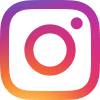
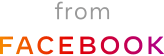

In [30]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
#url = 'https://twitter.com/'

#Im using INSTAGRAM. Let´s see if I can see it. 
url = 'https://www.instagram.com/zara/following/'
data = requests.get(url).text
soup = BeautifulSoup(data,'html.parser')
print(soup.prettify())

In [29]:
#your code
first = soup.select('li[class="wo9IH"]')
print(first)

[]


#### Number of followers of a given twitter account

You will need to include a ***try/except block*** in case account/s name not found. 
<br>***Hint:*** the program should count the followers for any provided account

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [ ]:
#your code

#### List all language names and number of related articles in the order they appear in wikipedia.org

In [ ]:
# This is the url you will scrape in this exercise
url = 'https://www.wikipedia.org/'

In [ ]:
#your code

#### A list with the different kind of datasets available in data.gov.uk 

In [ ]:
# This is the url you will scrape in this exercise
url = 'https://data.gov.uk/'

In [ ]:
#your code 

#### Top 10 languages by number of native speakers stored in a Pandas Dataframe

In [ ]:
# This is the url you will scrape in this exercise
url = 'https://en.wikipedia.org/wiki/List_of_languages_by_number_of_native_speakers'

In [ ]:
#your code

### BONUS QUESTIONS

#### Scrape a certain number of tweets of a given Twitter account.

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [ ]:
# your code

#### IMDB's Top 250 data (movie name, Initial release, director name and stars) as a pandas dataframe

In [ ]:
# This is the url you will scrape in this exercise 
url = 'https://www.imdb.com/chart/top'

In [ ]:
# your code

#### Movie name, year and a brief summary of the top 10 random movies (IMDB) as a pandas dataframe.

In [ ]:
#This is the url you will scrape in this exercise
url = 'http://www.imdb.com/chart/top'

In [ ]:
#your code

#### Find the live weather report (temperature, wind speed, description and weather) of a given city.

In [ ]:
#https://openweathermap.org/current
city = city=input('Enter the city:')
url = 'http://api.openweathermap.org/data/2.5/weather?'+'q='+city+'&APPID=b35975e18dc93725acb092f7272cc6b8&units=metric'

In [ ]:
# your code

#### Book name,price and stock availability as a pandas dataframe.

In [ ]:
# This is the url you will scrape in this exercise. 
# It is a fictional bookstore created to be scraped. 
url = 'http://books.toscrape.com/'

In [ ]:
#your code